In [2]:
import sys

# Change path to wherever you have repo locally
sys.path.append('/oak/stanford/groups/engreitz/Users/ymo/Tools/cNMF_benchmarking/cNMF_benchmarking_pipeline')

from Plotting.src import *

/home/users/ymo/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
program_loading_path = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.usages.k_100.dt_0_2.consensus.txt'
gene_loading_path = '/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/consensus_NMF.gene_spectra_score.k_100.dt_0_2.txt'
mdata_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240816_clustering_annotation_package/cNMF_100_0.2_preprocessed.h5mu"
save_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/Eval"
save_name = "Program 0 QC"

perbation_path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100"
file_name = "cNMF_100_gene_sample"

# Make PDF

In [70]:
from matplotlib.gridspec import GridSpec

def graph_pdf_program_QC(mdata_path, gene_loading_path, program_loading_path, perbation_path, file_name, target_program, save_path, save_name, remove_png = True):

    save_path = f'{save_path}/Program_QC/{target_program}'

    os.makedirs(f'{save_path}/', exist_ok=True)

    with PdfPages(f"{save_path}/{save_name}.pdf") as pdf:


        plot_top_gene_per_program(gene_loading_path, save_path = save_path, save_name = "Top_Program",  figsize= (2,3))
        plot_umap_per_program(mdata_path, program_loading_path, target_program = target_program, save_path = save_path, save_name = "UMAP" , figsize = (4,3))
        analyze_program_correlations(program_loading_path, save_path = save_path, save_name = "correlation" , figsize = (5,4))
        plot_violin(mdata_path, program_loading_path, target_program = target_program, figsize = (4,3), save_path = save_path, save_name = "violin")


        for samp in ['D0', 'sample_D1', 'sample_D2', 'sample_D3']:
            path = f"{perbation_path}/{file_name}_{samp}_perturbation_association.txt"
            plt = plot_volcano(path, down_thred_log=-0.05, up_thred_log=0.05, p_value_thred=0.05, target_program=target_program,save_path=save_path, save_name = f"volcano_{samp}")
            plt.close()

        fig = plt.figure(figsize=(30, 40))
        fig.suptitle(save_name, 
                    fontsize=24, fontweight='bold', y=0.95)


        fig = plt.figure(figsize=(30, 20))
        gs = GridSpec(3, 4, figure=fig)

        # First row - 2 plots (centered)
        ax1 = fig.add_subplot(gs[0, 1])
        ax2 = fig.add_subplot(gs[0, 2])

        # Second row - 2 plots (centered)
        ax3 = fig.add_subplot(gs[1, 1])
        ax4 = fig.add_subplot(gs[1, 2])

        # Third row - 4 plots
        ax5 = fig.add_subplot(gs[2, 0])
        ax6 = fig.add_subplot(gs[2, 1])
        ax7 = fig.add_subplot(gs[2, 2])
        ax8 = fig.add_subplot(gs[2, 3])

        img1 = plt.imread(f"{save_path}/Top_Program.png")
        ax1.imshow(img1)
        ax1.axis('off')
        
        img2 = plt.imread(f"{save_path}/UMAP.png") 
        ax2.imshow(img2)
        ax2.axis('off')

        img3 = plt.imread(f"{save_path}/correlation.png") 
        ax3.imshow(img3)
        ax3.axis('off')

        img4 = plt.imread(f"{save_path}/violin.png") 
        ax3.imshow(img4)
        ax3.axis('off')

        img5  = plt.imread(f"{save_path}/volcano_D0.png")
        ax5.imshow(img5)
        ax5.axis('off')

        img6 = plt.imread(f"{save_path}/volcano_sample_D1.png")
        ax6.imshow(img6)
        ax6.axis('off')

        img7 = plt.imread(f"{save_path}/volcano_sample_D2.png")
        ax7.imshow(img7)
        ax7.axis('off')

        img8 = plt.imread(f"{save_path}/volcano_sample_D3.png")
        ax8.imshow(img8)
        ax8.axis('off')
        
        
        plt.tight_layout()
        pdf.savefig(fig, bbox_inches='tight')
        plt.close()


        if remove_png:
            os.remove(f"{save_path}/Top_Program.png")
            os.remove(f"{save_path}/UMAP.png")
            os.remove(f"{save_path}/correlation.png")
            os.remove(f"{save_path}/violin.png")


Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


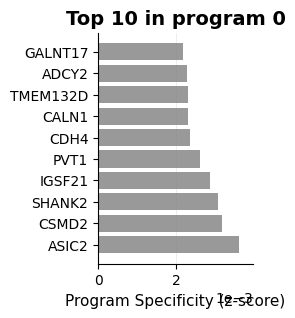

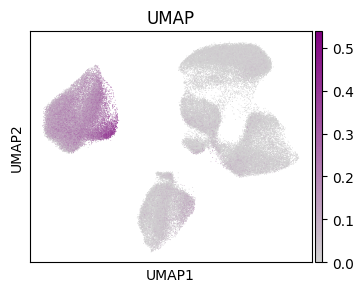

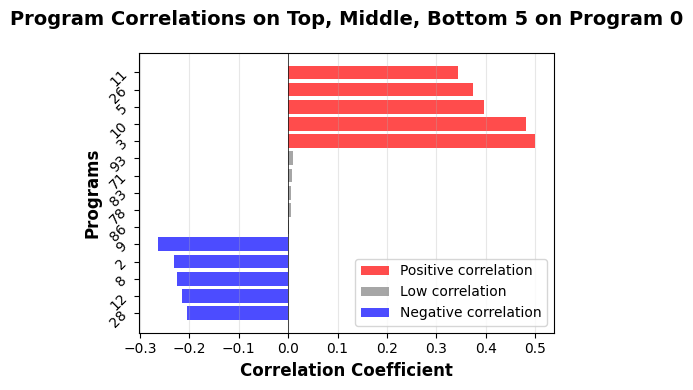

/tmp/ipykernel_4503/2601951314.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cell_type")


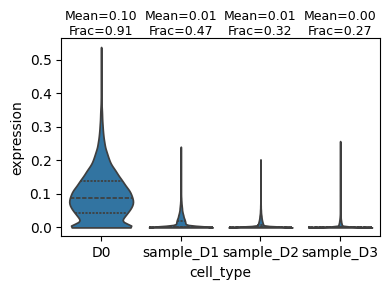

<Figure size 3000x4000 with 0 Axes>

In [71]:
graph_pdf_program_QC(mdata_path, gene_loading_path, program_loading_path, perbation_path, file_name, target_program = 0, save_path = save_path , save_name = save_name , remove_png = True)

# GO enrichment

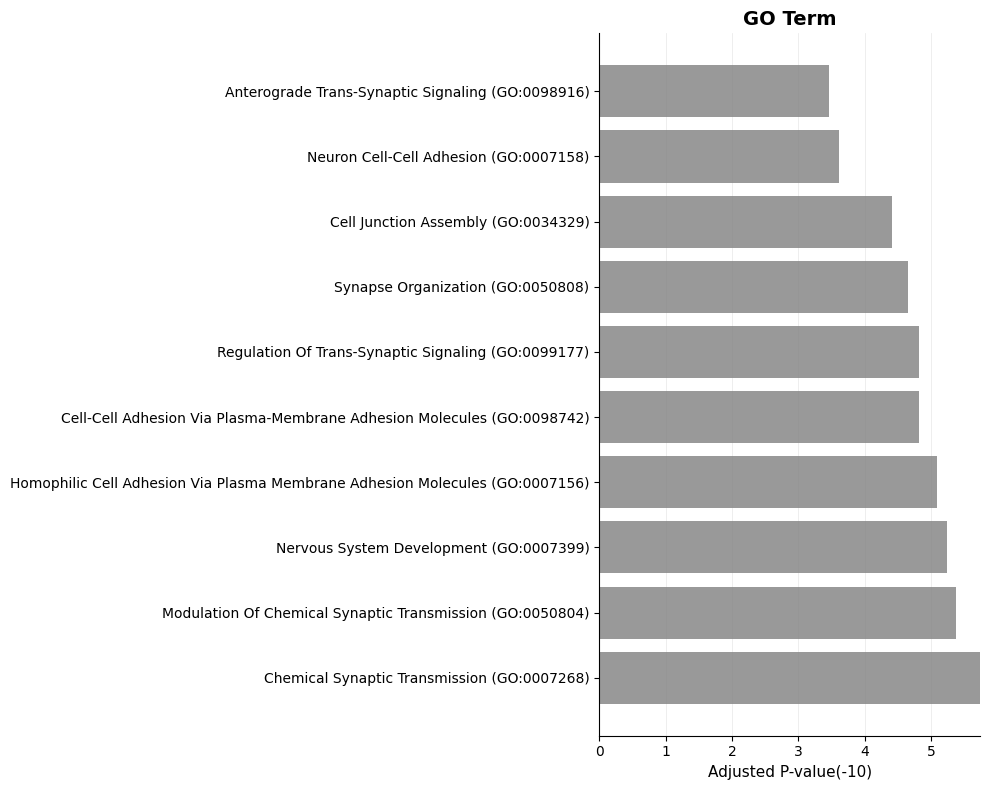

In [2]:
top_GO_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/240807_cNMF_eval_pipeline_analysis/100/100_GO_term_enrichment.txt")


# correlation

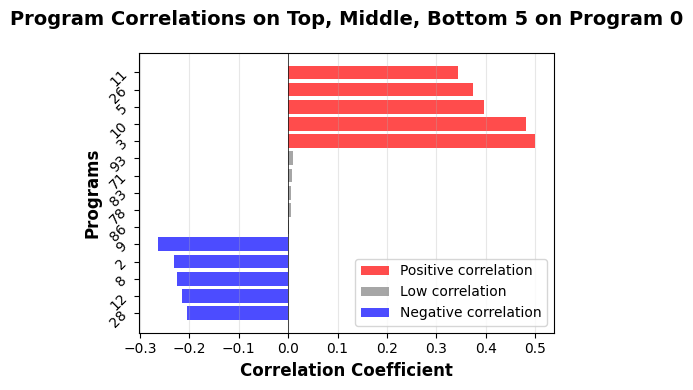

In [69]:
analyze_program_correlations(program_loading_path)

In [ ]:
# find most and least simliar programs
def analyze_program_correlations(program_loading_path, target_progarm = 0, num_program = 5, save_path=None, save_name = None, figsize = (5, 4)):


    df =  pd.read_csv(program_loading_path, sep='\t', index_col=0)

    # Calculate correlation matrix
    correlation_matrix = df.corr()
    
    # Get correlations with the target program
    target_correlations = correlation_matrix.iloc[target_progarm]
    target_correlations = target_correlations.drop(target_correlations.index[target_progarm])# Remove self-correlation
    
    # Sort correlations
    sorted_correlations = target_correlations.sort_values(ascending=False)
    
    # Get top and bottom gene
    top = sorted_correlations.head(num_program)
    bottom = sorted_correlations.tail(num_program)


    # Get the middle gene
    abs_correlations = sorted_correlations.abs().sort_values()
    middle = abs_correlations.head(num_program)
    
    # Combine for plotting
    combined_correlations = pd.concat([bottom, middle, top])

    # Create the plot
    fig = plt.figure(figsize=figsize)
    
    # Create horizontal bar plot
    colors = ['blue' if i < num_program else 'grey' if i < num_program*2 else 'red' for i in range(len(combined_correlations))]
    
    bars = plt.barh(range(len(combined_correlations)), combined_correlations.values, color=colors, alpha=0.7)
    
    # Customize the plot
    title = f'Program Correlations on Top, Middle, Bottom {num_program} on Program {target_progarm}'
    plt.title( title, fontsize=14, fontweight='bold', pad=20)
    plt.ylabel('Programs', fontsize=12, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
    
    # Set x-axis labels
    plt.yticks(range(len(combined_correlations)), 
               combined_correlations.index, 
               rotation=45, 
               ha='right')

    
    # Add a vertical line at x=0
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Positive correlation'),
                      Patch(facecolor='grey', alpha=0.7, label='Low correlation'),
                      Patch(facecolor='blue', alpha=0.7, label='Negative correlation')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    # Adjust layout
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    plt.show()
    
    # Save if path provided
    if save_path and save_name:
        fig.savefig(f'{save_path}/{save_name}.png', dpi=300, bbox_inches='tight')
 

# plot volin

In [67]:

# make violin plot on cell loadings 
def plot_violin(mdata_path, program_loading_path, target_program, figsize = (4,3), save_path = None, save_name = None):

    # read data
    mdata = mu.read_h5mu(mdata_path)
    adata = mdata['rna']
    usage_norm =  pd.read_csv(program_loading_path, sep='\t', index_col=0)


    # Build dataframe
    df = pd.DataFrame({
        "expression": usage_norm.iloc[:,0],
        "cell_type": adata.obs["sample"].values
    })

    # Compute summary stats per cell_type
    summary = (
        df.groupby("cell_type")
        .agg(
            mean_expr=("expression", "mean"),
            frac_cells=("expression", lambda x: (x > 0).mean())
        )
        .reset_index()
    )

    # Make violinplot
    fig = plt.figure(figsize=figsize)
    ax = sns.violinplot(
        data=df,
        x="cell_type",
        y="expression",
        inner="quartile",
        density_norm='width',
        cut = 0)

    # Annotate mean & fraction above violins
    for i, row in summary.iterrows():
        ax.text(
            i,                      # x position
            df["expression"].max()*1.05,  # just above max y
            f"Mean={row['mean_expr']:.2f}\nFrac={row['frac_cells']:.2f}",
            ha="center", va="bottom", fontsize=9, color="black"
        )

    plt.tight_layout()
    plt.show()

    #ax.set_title("Expression Distribution per Day", fontsize=14, weight="bold")


    if save_path and save_name:
        fig.savefig(f"{save_path}/{save_name}.png", dpi=300, bbox_inches='tight')

    return fig

/tmp/ipykernel_21962/2208777143.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("cell_type")


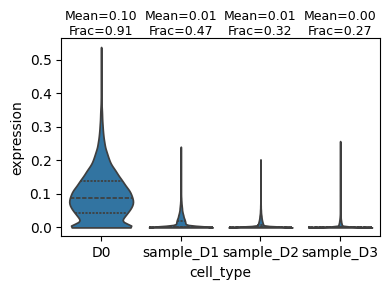

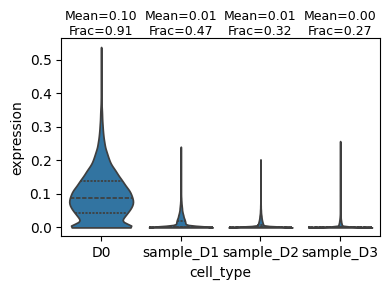

In [68]:
plot_violin(mdata_path,program_loading_path,0)

# Motif enrichment

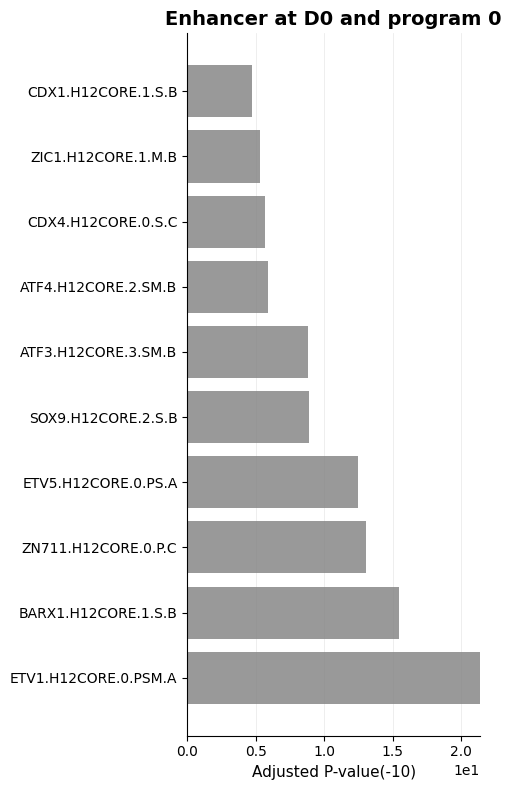

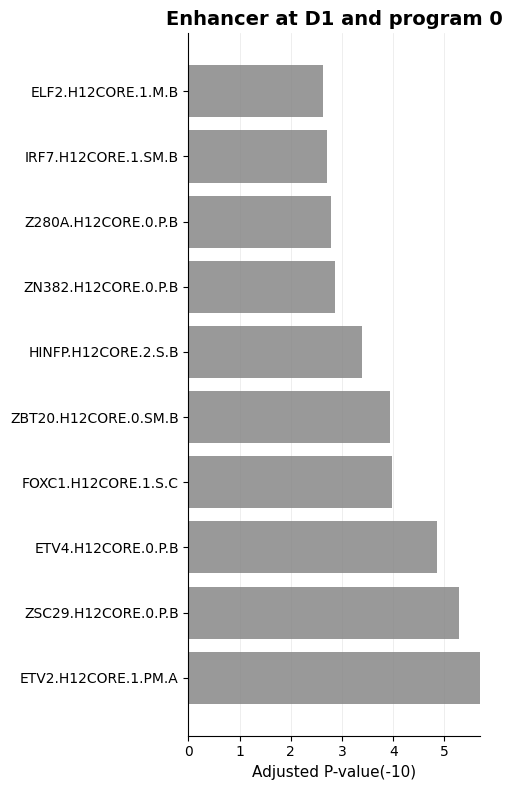

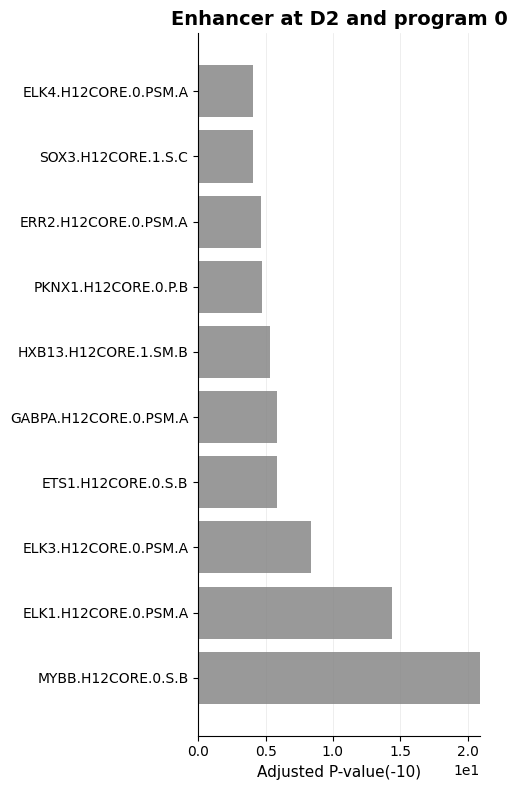

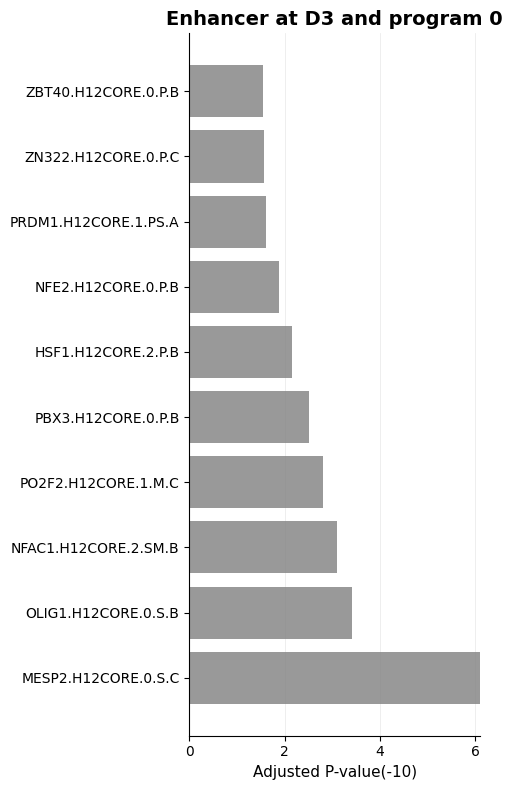

In [2]:
plot_all_days_motif("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_enhancer.txt", 
        title = "Enhancer")

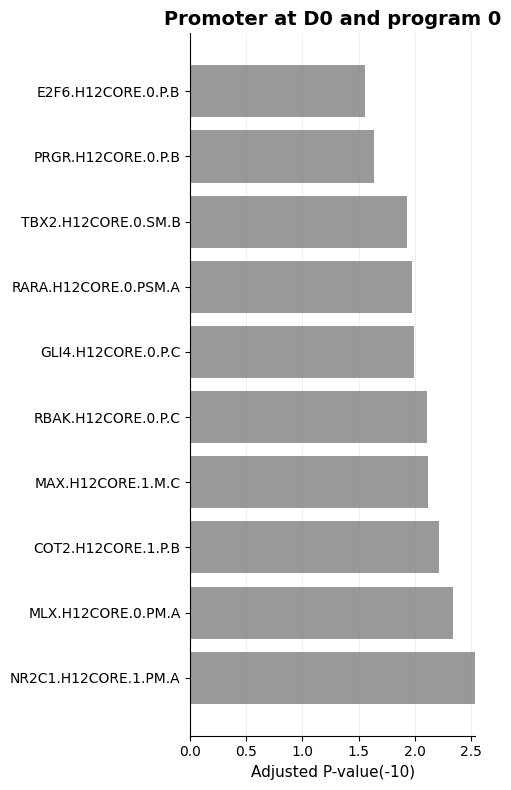

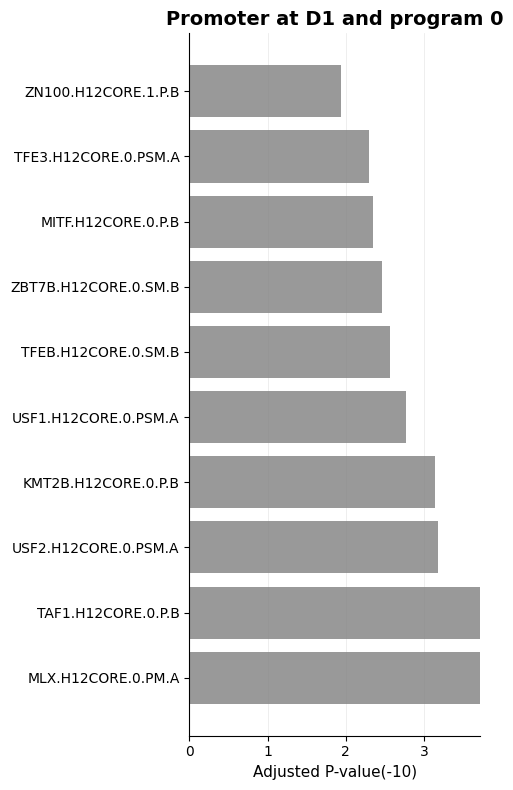

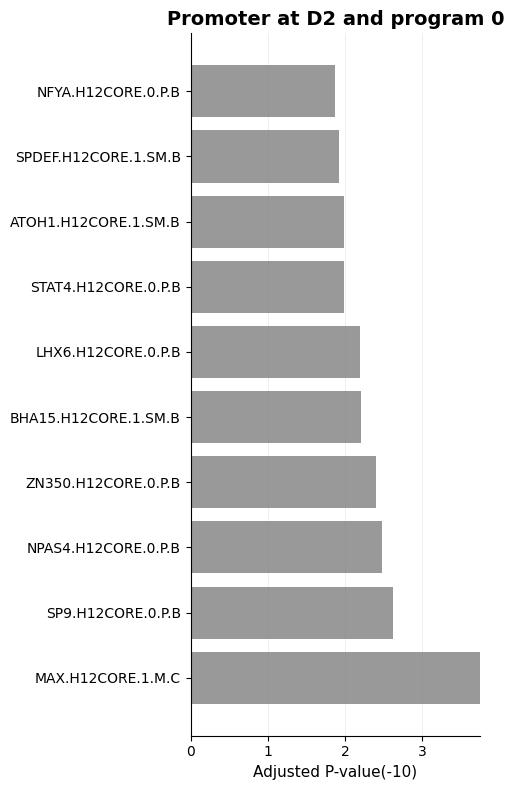

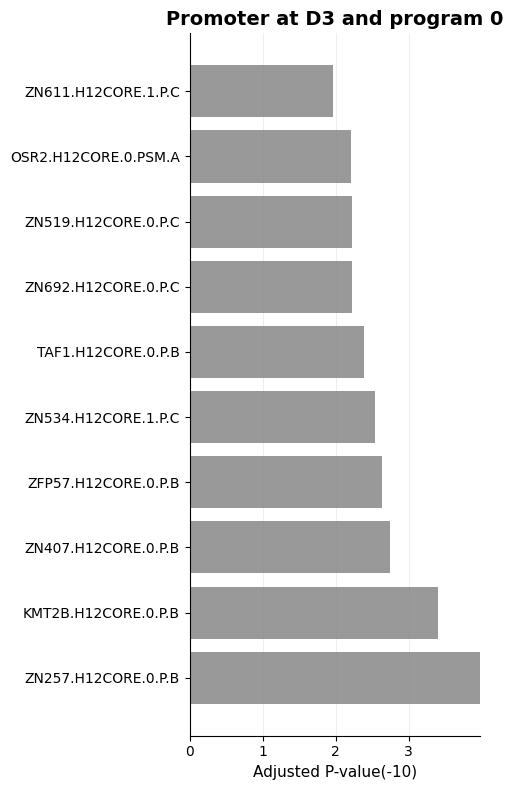

In [14]:
plot_all_days_motif("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_promoter.txt", 
        title = "Promoter")

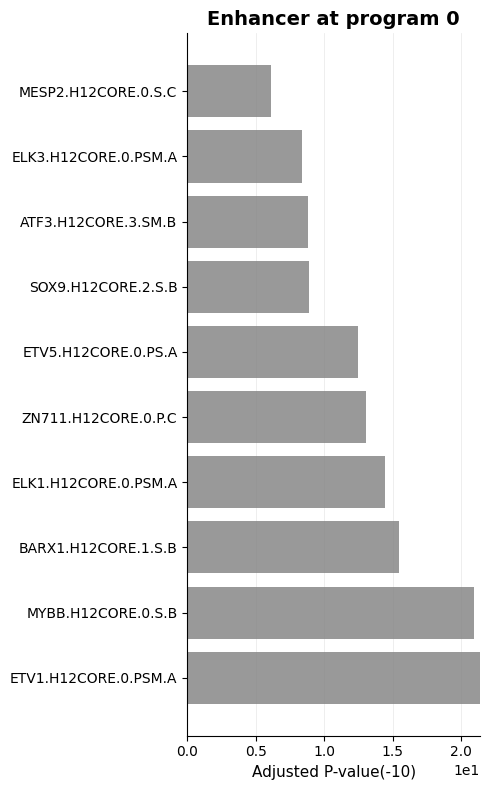

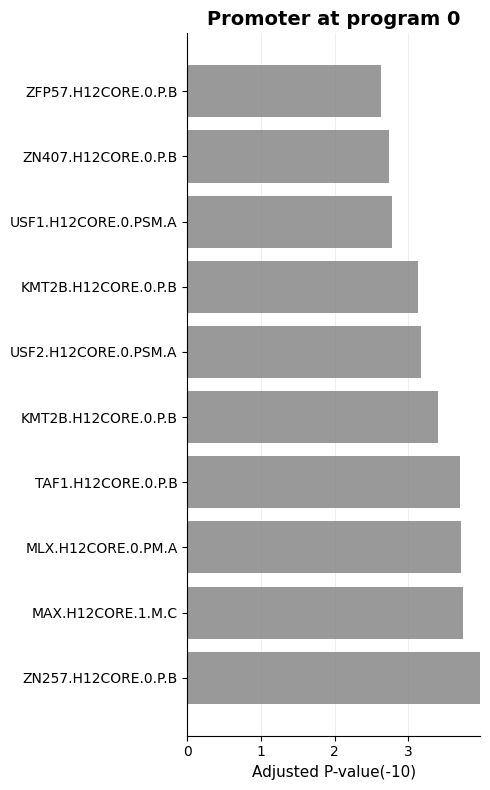

In [18]:
plot_motif_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_enhancer.txt", 
p_value_name ="adj_pval",
title = "Enhancer")

plot_motif_per_program("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/analysis/241119_scE2G_motif_enrichment/cNMF_100_motif_enrichment_promoter.txt", 
p_value_name ="adj_pval",
title = "Promoter")

# perturbationa analysis

## bar plot

In [48]:
# plot barplot for top/bottom genes  
def plot_top_bottom_genes(path, tagert_program, gene_col='target_name', log2fc_col='log2FC', num_gene = 5, save_path=None, save_name = None, figsize = (5, 4)):

    # read df
    df = pd.read_csv(path, sep = "\t")

    # Sort by log2FC
    df_sorted = df.loc[df["program_name"] == tagert_program]
    df_sorted = df_sorted[df_sorted['adj_pval'] < 0.05]
    df_sorted = df_sorted.sort_values(by=log2fc_col, ascending=False) 
    
    # Get top and bottom gene
    top_gene = df_sorted.head(num_gene)
    bottom_gene = df_sorted.tail(num_gene)
    
    # Combine and add category
    top = top_gene.copy()
    top['category'] = f'Top {num_gene} (Upregulated)'
    
    bottom = bottom_gene.copy()
    bottom['category'] = f'Bottom {num_gene} (Downregulated)'
    
    # Combine data
    #plot_data = pd.concat([bottom,top])
    merge_columns = [col for col in bottom.columns if col != 'category']
    plot_data = pd.merge(top, bottom, on=merge_columns, how='outer')
    plot_data = plot_data.sort_values(by=log2fc_col, ascending=False)
    
    # Create the plot
    plt.figure(figsize=figsize)
    
    # Create horizontal bar plot
    colors = ['red' if x > 0 else 'blue' for x in plot_data[log2fc_col]]    
    bars = plt.barh(range(len(plot_data)), plot_data[log2fc_col], color=colors, alpha=0.7)
    
    # Customize the plot
    plt.yticks(range(len(plot_data)), plot_data[gene_col])
    plt.xlabel('log2FC', fontsize=12)
    plt.ylabel('Genes', fontsize=12)

    title = f'Top {num_gene} and Bottom {num_gene} Genes for Program {tagert_program}'
    plt.title(title, fontweight='bold')
    
    # Add a vertical line at x=0
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    
    # Add value labels on bars
    #for i, (bar, value) in enumerate(zip(bars, plot_data[log2fc_col])):
    #    plt.text(value + (0.1 if value > 0 else -0.1), i, f'{value:.2f}', 
    #            va='center', ha='left' if value > 0 else 'right', fontsize=10)
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='red', alpha=0.7, label='Upregulated'),
                      Patch(facecolor='blue', alpha=0.7, label='Downregulated')]
    plt.legend(handles=legend_elements, loc='lower right')
    
    # Adjust layout
    plt.tight_layout()
    plt.grid(axis='x', alpha=0.3)
    
    # Save if path provided
    if save_path:
        plt.savefig(f'{title}/{save_path}.png', dpi=300, bbox_inches='tight')
    
    plt.show()

    return plot_data


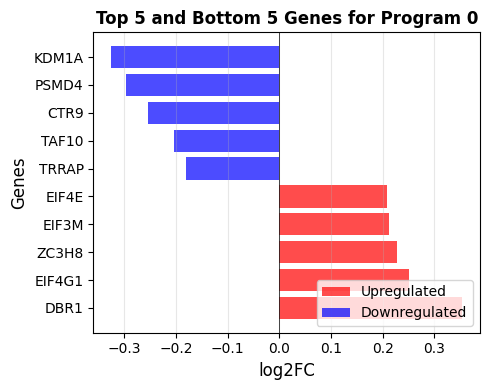

In [63]:
path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_D0_perturbation_association.txt"

df = plot_top_bottom_genes(path,0)

## gene expression dot plot

In [17]:
import scanpy as sc
adata = sc.read_h5ad("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Results/cNMF_100_07102024/consensus_NMF/cnmf_tmp/consensus_NMF.norm_counts.h5ad")

In [ ]:
adata.var_names_make_unique()
gene_list = df["target_name"].tolist()
plot_gene_expression_dotplot(adata,gene_list)

In [24]:
def plot_gene_expression_dotplot(adata, gene_list, sample_col="sample", 
                                cell_type_col=None, figsize=(12, 8), 
                                save_path=None, **kwargs):

    
    
    # Check if genes exist in the data
    genes_in_data = [gene for gene in gene_list if gene in adata.var_names]
    missing_genes = [gene for gene in gene_list if gene not in adata.var_names]
    
    if missing_genes:
        print(f"Warning: The following genes were not found in the data: {missing_genes}")
        print(f"Available similar genes: {[g for g in adata.var_names if any(mg.lower() in g.lower() for mg in missing_genes)][:10]}")
    
    if not genes_in_data:
        raise ValueError("None of the specified genes were found in the data")
    
    print(f"Plotting {len(genes_in_data)} genes: {genes_in_data}")
    
    # Set default parameters for dotplot
    dotplot_params = {
        'color_map': 'Reds',
        'dot_max': 0.8,
        'dot_min': 0.1,
        'figsize': figsize,
        'show': False,
        'return_fig': True
    }
    
    
    # Create the dotplot
    dp = sc.pl.dotplot(adata, genes_in_data, 
                       groupby='sample', swap_axes=True)
    
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return dp


## volcano plot

In [49]:
# plot one volcone plot given file path
def plot_volcano(path, target_program, down_thred_log = -0.05, up_thred_log = 0.05, p_value_thred = 0.05,  save_path = None, save_name = None):

    df = pd.read_csv(path, sep = "\t")
    df_program = df.loc[df["program_name"] == target_program]

    plt.scatter(x=df_program['log2FC'],y=df_program['adj_pval'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

    # highlight down- or up- regulated genes
    down = df_program[(df_program['log2FC']<=down_thred_log)&(df_program['adj_pval']<=p_value_thred)]
    up = df_program[(df_program['log2FC']>=up_thred_log)&(df_program['adj_pval']<=p_value_thred)]

    plt.scatter(x=down['log2FC'],y=down['adj_pval'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
    plt.scatter(x=up['log2FC'],y=up['adj_pval'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

    for i,r in up.iterrows():
        plt.text(x=r['log2FC'],y=-np.log10(r['adj_pval']),s=r['target_name'])

    for i,r in down.iterrows():
        plt.text(x=r['log2FC'],y=-np.log10(r['adj_pval']),s=r['target_name'])
        
    plt.xlabel("log2FC")
    plt.ylabel("adj_pval")
    plt.axvline(down_thred_log,color="grey",linestyle="--")
    plt.axvline(up_thred_log,color="grey",linestyle="--")
    plt.axhline(-np.log10(p_value_thred),color="grey",linestyle="--")
    plt.legend()
    plt.title(f"volcano plot for program {target_program} on {save_name}")

    if save_path and save_name:
        plt.savefig(f"{save_path}/{save_name}.png")

    return plt

# plot volcano plots by date
def plot_all_days_valcano(in_folder_name, in_file_name,  down_thred_log = -0.05, up_thred_log = 0.05, p_value_thred = 0.05, target_program = 0, save_path = None, save_name = None):
    for samp in ['D0', 'sample_D1', 'sample_D2', 'sample_D3']:
        path = f"{in_folder_name}/{in_file_name}_{samp}_perturbation_association.txt"
        plt = plot_volcano(path, down_thred_log=down_thred_log, up_thred_log=up_thred_log, p_value_thred=p_value_thred, target_program=target_program,save_path=save_path, save_name = f"{samp}")
        plt.show()
        plt.close
    


<module 'matplotlib.pyplot' from '/oak/stanford/groups/engreitz/Users/ymo/miniforge3/envs/NMF_Benchmarking/lib/python3.9/site-packages/matplotlib/pyplot.py'>

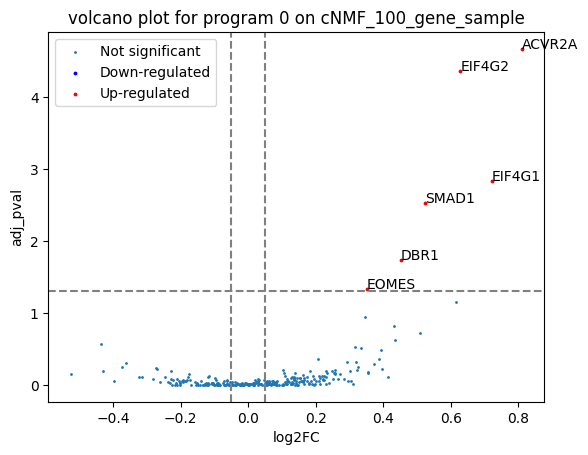

In [39]:
path = "/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100/cNMF_100_gene_sample_sample_D1_perturbation_association.txt"

plot_volcano(path,0)

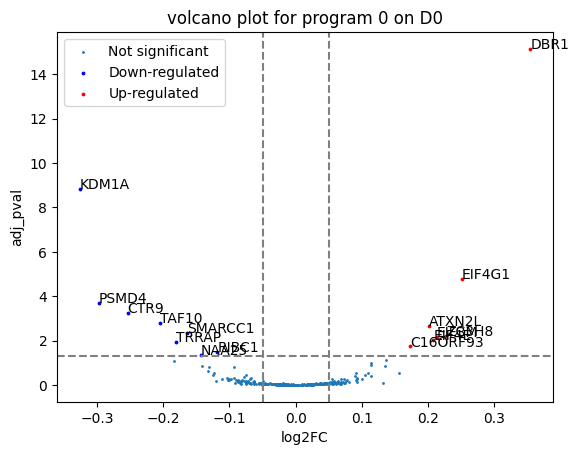

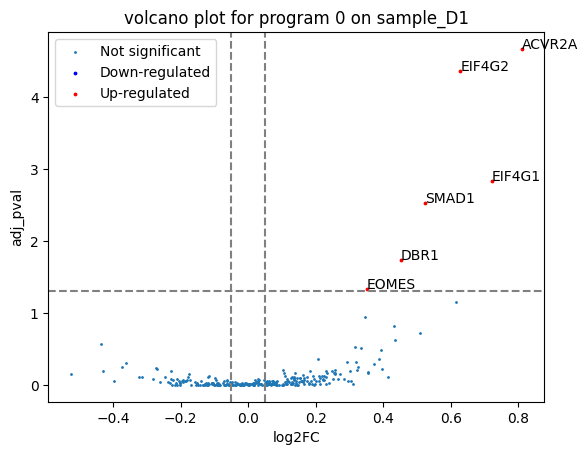

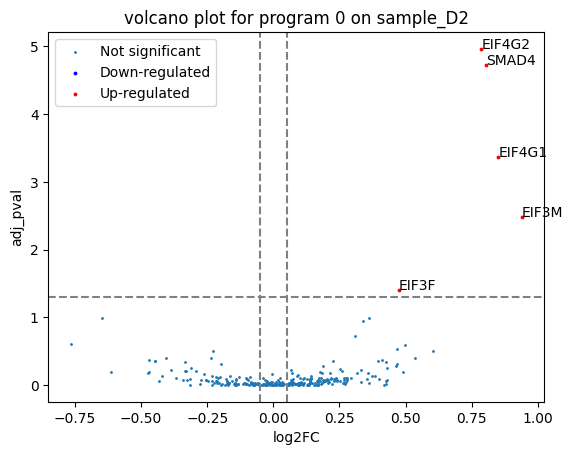

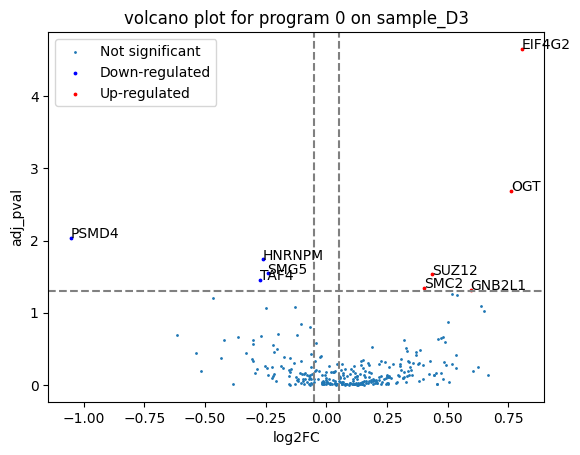

In [50]:
plot_all_days_valcano("/oak/stanford/groups/engreitz/Users/ymo/NMF_re-inplementing/Script/Revant_code/original_code/shared/250110_ipsc_ec_dashboard_setup/cNMF_100",
                      "cNMF_100_gene_sample")